### This is the first Part of Exploratory Data Analysis (EDA) & Processing Data 

### Part 1 ==============================> Processing Missing Values

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import shutil

# Processing missing values

We shall check for missing values in every features we have, it's really an important task to do because as i have stated earlier there is a lot of missing values and just None value inside each feature.

In [9]:
data = pd.read_pickle("pickle_files/data")

In [ ]:
features = data.columns

In [ ]:
for f in features:
  print("Number of missing values in" , f , "=" , data[f].isnull().sum())

Number of missing values in asin = 0
Number of missing values in brand = 151
Number of missing values in color = 118182
Number of missing values in large_image_url = 0
Number of missing values in product_type_name = 0
Number of missing values in title = 0
Number of missing values in formatted_price = 154743
Number of missing values in manufacturer = 140239


It's clear that the most columns with missing values is color, formatted_price, and manufacter with about 118K, 154K and 140K respectievly which is really large number.

Now let's see the percentage of missing values out of each column we have.

In [ ]:
for f in features:
  print("Percentage of missing values in" , f , "=" , (data[f].isnull().sum() / data.shape[0]) * 100 , "%")

Percentage of missing values in asin = 0.0 %
Percentage of missing values in brand = 0.08245148467276044 %
Percentage of missing values in color = 64.53166464633227 %
Percentage of missing values in large_image_url = 0.0 %
Percentage of missing values in product_type_name = 0.0 %
Percentage of missing values in title = 0.0 %
Percentage of missing values in formatted_price = 84.49529862726467 %
Percentage of missing values in manufacturer = 76.57558780810099 %


Almost all values of color, price, and manufacter are missing and this may cause a problem, for that we have two choices to deal wtih this issue, either remove all rows with null values or try to analysis the data we have in order to conlude why there is a lot of missing values and then try to impute missing data or remove them based on the results we shall find out later on.

for the brand less than 1% of value is missing (151) values so we can easily remove those rows from the dataset.

But before we decide, let's explore the nature of each feature we have for the sake of better conclusion.

For the asin features it's obvious that it's should be unique for each row because it's the ID so there should be no two rows with an identical id number and this would be generated automatically so there will be zero chance for this column to have Null of absence values in it.

Now i will spot on the count of available rows in each feature, the number of unique value in it, the most frequent value and it's frequency.

In [ ]:
data['brand'].describe()

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object

In [ ]:
data['color'].describe()

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object

In [ ]:
data['title'].describe()

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object

In [ ]:
data['manufacturer'].describe()

count         42899
unique         3872
top       Fifth Sun
freq            261
Name: manufacturer, dtype: object

In [ ]:
data['product_type_name'].describe()

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object

Now from the above outputs we can conclude that we have a high cardinality features which is brand as it contain a lot of diffrent categories, this may cause a problem later specially if we decide to use Trees classifer it might led those classifer to overfit.

For the color feature it's also high cardinal feature although it contain less categories than brand but that due to the fact that almost 64.5% is just null values so we can consider it also a high cardinal feature.

The title is the most informative feature, it contain a lot of predicitve power and it should be unique of all rows but from the above maybe there is about 8K duplicated rows, we shall deal with them later.

Manufacter feature is similar to color but it contain less categories, mostly i will drop this feature from the processing.

formatted_price feature is mixed feature because it is between number and category feature so dealing with this kind of feature would be diffrent not to mention that almost 84.5% of it is missing so it's not available for all observations we have.

Finally product_type_name which is the type of the product it contain small number of categories comparing to other features, furthermore we have some uncessary of mistakenly categories here we don't want which make number of categories in it even less, this king of features is good if we decide to gather products based on it using for examply clustering.


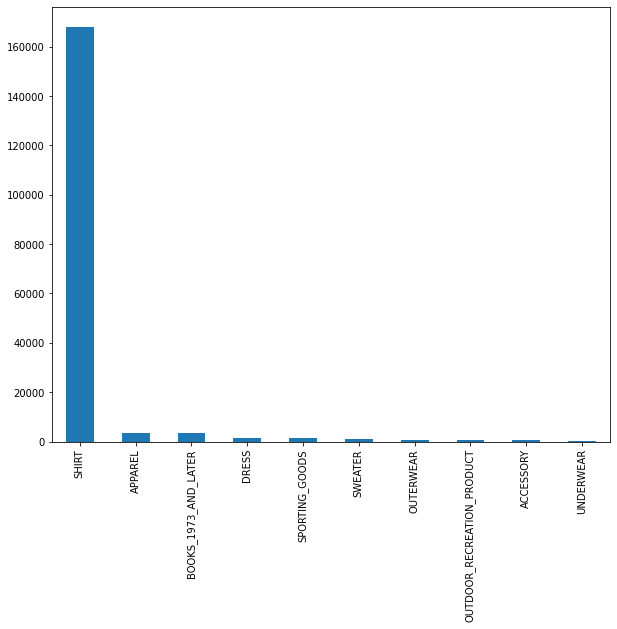

In [ ]:
# Cheking categories in product_type_name column
plt.figure(figsize = (10 , 8))
pd.Series(data['product_type_name']).value_counts()[:10].plot(kind = "bar")
plt.show()

By far the most frequent one category we have is SHIRT, the other categories is far less frequent which may be good for us if we consider taking distance or similarity between products rather than using each feature as predictor of bunch of them togeather.

Now we will make some analysis over our three major missing values features which is color , price and manufacter in order to make some sense out of it if that's possible

But first let's try to understand why there are missing values here, we can classify missing values in 3 categories:

1. Misisng value completely at random (MCAR).

2. Missing value at random (MAR).

3. Missing value not at random (MNAR).

For each type of them there is a way of preocessing if we choose not to remove them but to process them in separate way.

In [ ]:
data[data['color'].isnull()][data['manufacturer'].isnull()][data['formatted_price'].isnull()].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,asin,brand,color,large_image_url,product_type_name,title,formatted_price,manufacturer
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,None
7,B074GPTP3J,Floerns,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Floerns Women's Bell Sleeve Beading Casual Blo...,None,None


In [ ]:
missing_for_color_manufacturer = data[data['color'].isnull()][data['manufacturer'].isnull()]
missing_for_color_price = data[data['color'].isnull()][data['formatted_price'].isnull()]
missing_for_manufacturer_price = data[data['manufacturer'].isnull()][data['formatted_price'].isnull()]
missing_for_all_cols = data[data['color'].isnull()][data['manufacturer'].isnull()][data['formatted_price'].isnull()]

In [ ]:
print("Number of missing values for color" , data['color'].isnull().sum())
print("Number of missing values for manufacturer" , data['manufacturer'].isnull().sum())
print("Number of missing values for formatted_price" , data['formatted_price'].isnull().sum())
print()
print("Number of missing values common between color and manufacturer " , len(missing_for_color_manufacturer))
print("Number of missing values common between color and price " , len(missing_for_color_price))
print("Number of missing values common between manufacturer and price" , len(missing_for_manufacturer_price))
print("Number of missing values common between all three features" , len(missing_for_all_cols))

Number of missing values for color 118182
Number of missing values for manufacturer 140239
Number of missing values for formatted_price 154743

Number of missing values common between color and manufacturer  92526
Number of missing values common between color and price  118172
Number of missing values common between manufacturer and price 120185
Number of missing values common between all three features 92518


In [10]:
data['color_null'] = np.where(data['color'].isnull() , 1 , 0)

In [ ]:
ratio_of_missing_at_color = data.groupby(['product_type_name'])['color_null'].mean() * 100

In [ ]:
ratio_of_missing_at_color[np.argsort(ratio_of_missing_at_color)[::-1]][:25]

product_type_name
WIRELESS_ACCESSORY            100.000000
ART_AND_CRAFT_SUPPLY          100.000000
ORCA_SHIRT                    100.000000
CONSUMER_ELECTRONICS          100.000000
PROFESSIONAL_HEALTHCARE       100.000000
SEEDS_AND_PLANTS              100.000000
HOME_FURNITURE_AND_DECOR      100.000000
ABIS_SPORTS                   100.000000
HOME_BED_AND_BATH              81.818182
SHOES                          80.303030
HOME                           76.470588
OUTDOOR_RECREATION_PRODUCT     67.764060
SHIRT                          67.209197
BRA                            63.157895
KITCHEN                        60.869565
DRESS                          55.492424
UNDERWEAR                      54.352941
SWIMWEAR                       53.658537
SHORTS                         50.000000
PET_SUPPLIES                   50.000000
SHIRTS                         50.000000
BABY_PRODUCT                   50.000000
BAG                            50.000000
HAT                            50.00000

In [ ]:
most_frequent_cat = data['product_type_name'].value_counts()[:25]
most_frequent_cat

SHIRT                          167794
APPAREL                          3549
BOOKS_1973_AND_LATER             3336
DRESS                            1584
SPORTING_GOODS                   1281
SWEATER                           837
OUTERWEAR                         796
OUTDOOR_RECREATION_PRODUCT        729
ACCESSORY                         636
UNDERWEAR                         425
PANTS                             363
ORCA_SHIRT                        290
BLAZER                            249
SHOES                             198
SLEEPWEAR                         142
SKIRT                             107
BRA                                95
HEALTH_PERSONAL_CARE               92
TOYS_AND_GAMES                     80
MISC_OTHER                         62
AUTO_ACCESSORY                     52
KITCHEN                            46
SWIMWEAR                           41
POWERSPORTS_PROTECTIVE_GEAR        40
HOME                               34
Name: product_type_name, dtype: int64

In [ ]:
t1 = (ratio_of_missing_at_color[np.argsort(ratio_of_missing_at_color)[::-1]][:25]).index

In [ ]:
intersection_set = list(set(most_frequent_cat.index).intersection(set(t1)))

In [ ]:
print("Length of intersection" , len(intersection_set))
intersection_set

Length of intersection 11


['BRA',
 'SHOES',
 'SWEATER',
 'SWIMWEAR',
 'HOME',
 'UNDERWEAR',
 'DRESS',
 'ORCA_SHIRT',
 'KITCHEN',
 'OUTDOOR_RECREATION_PRODUCT',
 'SHIRT']

The most interesting thing is between manufacturer and price, we can see that about 120K out of 183K are common.

for the other pair for example between color and price there is also about 118K more or less out of 183K.

There is a chance that Amazon does not want to provide the data of price for some colthes.

some manufacturer also order to block this information as term of policy or any other reason.

So for the best call we should dig deep in the way the data were collected in order to decide if the missing here not at random or at random which is difficult thing to achive here.

The actual problem here is that this 3 features contain a lot of categories for each one individually, if not we could make further analysis to know the missing value came for which category of the opposite one as kind of try to detect where was the data actually happend.

I could safely assume that missing data here could not be completely at ranodm, it either belong to MAR or MNAR, as it's safer to assume that misisng values type belong to MAR than MCAR.

But to identify if data MNAR it's a little bit more difficult here.

We can coclude that missing values here don't happedn at random completely, because of the connection if missingness between those features and the fact that fron the last few cells missing values happend completely for some categories 11 of of them are from the top 25 categories, so the fact that for example SHIRT category which consist of about 167K out of 183K has 67% of missing value for color feature leaving us with the conclusion that this missing in data happed for a reason.

To end this long run here is 3 ways to deal wtih thoose missing value:

1- Impute them.

2- Drop the columns.

3- Drop the rows.

We can't use Imputing method in it's diffrent techinques unless we are very sure that the missing data is missing at random and only at random, if the data is missing not at ranodm that will cause a bias in data and corrupt the distribution of features.

Dropping the rows used usually when number of observation is not high and when the data is missing completely at random but here if we use this method then we remove about 160K of data which leave us with only about 28K.

There is a rule of thumb that say if variable contain more than 60-70% precent of missing data and the variable is not really informative and important then it's better to drop this variable out of the analysis.

from the fact that title and images are the most informative features we shall remove our 3 features rather than droping about 160K rows which is here a big loose.

For a brand feature we are good to remove rows containig missing values because they are just 151 out of 183K so dropping them will not be a big deal.

In [11]:
data.drop(['color' , 'formatted_price'	, 'manufacturer'] , axis = 1 , inplace = True)

In [16]:
print("Number of rows in data after first processing =", data.shape[0])
print("Number of columns in data after first processing =", data.shape[1])

Number of rows in data after first processing = 182987
Number of columns in data after first processing = 6


In [ ]:
data.head()

,asin,brand,large_image_url,product_type_name,title,color_null
0,B016I2TS4W,FNC7C,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,1
1,B01N49AI08,FIG Clothing,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,1
2,B01JDPCOHO,FIG Clothing,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,1
3,B01N19U5H5,Focal18,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,1
4,B004GSI2OS,FeatherLite,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,0


In [ ]:
data.isnull().sum()

asin                   0
brand                151
large_image_url        0
product_type_name      0
title                  0
color_null             0
dtype: int64

In [14]:
data.dropna(axis = 0 , subset = ['brand'] , inplace = True)

In [17]:
print("Number of rows in data after second processing =", data.shape[0])
print("Number of columns in data after second processing =", data.shape[1])

Number of rows in data after second processing = 182987
Number of columns in data after second processing = 6


In [ ]:
data.isnull().sum()

asin                 0
brand                0
large_image_url      0
product_type_name    0
title                0
color_null           0
dtype: int64

In [ ]:
# Run this cell if you want to save data at this stage
data.to_pickle('pickle_files/data')